## For reproducing this code kindly change the "speech_key" "service_region"

In [6]:
pip install flask flask-socketio joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 913.0 kB/s eta 0:00:00--:--

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Transcribed: 
Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


In [5]:
pip install sounddevice numpy scipy azure-cognitiveservices-speech


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Sentiment analysis for 28th June meeting (real-time)

Start speaking...
Transcribed: Hello.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Transcribed: What is your time now, Sir?
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Transcribed: Is 7:30 in the morning OK? OK, I'm I made it up on the 5:00 PM so today.
Sentiment: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.7065}
Transcribed: Is too early right for you guys?
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Transcribed: Sorry, what?
Sentiment: {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.0772}
Transcribed: Now from Korea, the call will be from 5:00 PM ISP. So that's what I'll OK, OK.
Sentiment: {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.7065}
Transcribed: What is the progress?
Sentiment: {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
Transcribed: Let's start for a call later Solitaire, you have been struggling with Amazon AP integration, right? So have you got the developer account d

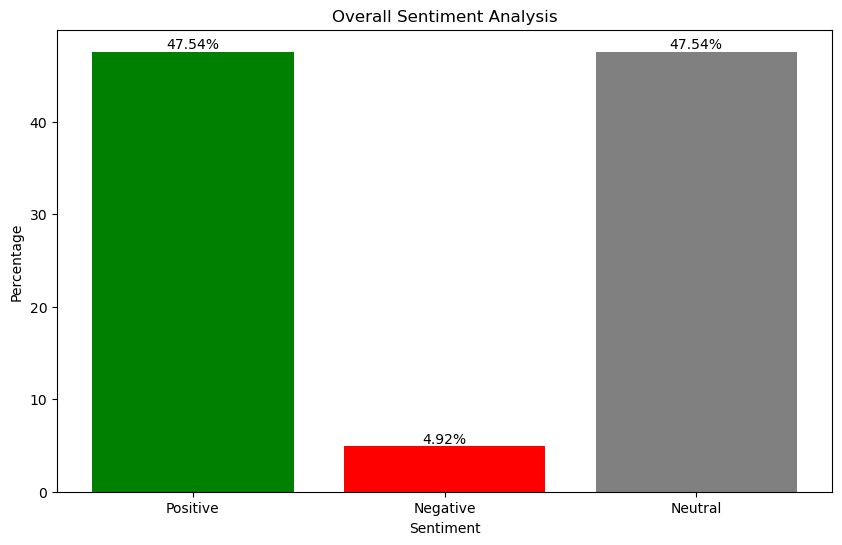

Sentiment analysis output saved to sentiment_analysis_output.json


In [12]:
import azure.cognitiveservices.speech as speechsdk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

# Azure Speech service setup
speech_key = "fc3a5dafb0d140cca6b1bdf318655b87"
service_region = "eastus"

def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    return sentiment

def sentiment_color(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'green'
    elif sentiment['compound'] <= -0.05:
        return 'red'
    else:
        return 'grey'

def transcribe_and_analyze_sentiment():
    speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
    audio_config = speechsdk.audio.AudioConfig(use_default_microphone=True)
    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)
    sentiments = []

    def handle_final_result(evt):
        text = evt.result.text
        sentiment = analyze_sentiment_vader(text)
        color = sentiment_color(sentiment)
        
        # Use ANSI escape codes for colored output
        color_code = {
            'green': '\033[92m',  # Green
            'red': '\033[91m',    # Red
            'grey': '\033[90m'    # Grey
        }
        reset_color = '\033[0m'   # Reset to default color
        
        print(f"{color_code[color]}Transcribed: {text}")
        print(f"Sentiment: {sentiment}{reset_color}")
        
        sentiments.append(sentiment)

    speech_recognizer.recognized.connect(handle_final_result)
    print("Start speaking...")
    speech_recognizer.start_continuous_recognition()
    input("Press Enter to stop transcribing...\n")
    speech_recognizer.stop_continuous_recognition()
    overall = overall_sentiment(sentiments)
    plot_overall_sentiment(overall)
    save_results(sentiments, overall)
    
def overall_sentiment(sentiments):
    positive = 0
    negative = 0
    neutral = 0
    for sentiment in sentiments:
        if sentiment['compound'] >= 0.05:
            positive += 1
        elif sentiment['compound'] <= -0.05:
            negative += 1
        else:
            neutral += 1
    total = positive + negative + neutral
    overall = {
        "positive": positive / total * 100,
        "negative": negative / total * 100,
        "neutral": neutral / total * 100
    }
    print(f"Overall Sentiment: {overall}")
    return overall

def plot_overall_sentiment(overall):
    import matplotlib.pyplot as plt
    categories = ['Positive', 'Negative', 'Neutral']
    values = [overall['positive'], overall['negative'], overall['neutral']]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, values, color=['green', 'red', 'grey'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.title('Overall Sentiment Analysis')
    plt.savefig('overall_sentiment_plot.png')
    plt.show()

def save_results(sentiments, overall):
    output = {
        "sentiments": sentiments,
        "overall_sentiment": overall
    }

    output_file = 'sentiment_analysis_output.json'
    with open(output_file, 'w') as f:
        json.dump(output, f, indent=4)

    print(f"Sentiment analysis output saved to {output_file}")

if __name__ == "__main__":
    transcribe_and_analyze_sentiment()


## Testing on Tamil language words

Start speaking...
Transcribed: Panama like ippo namma pesurathu ellame record panni like transcript pannanum so start P speaking solitaire irukkalla so if I start.
Sentiment: {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.6124}
Transcribed: Aama.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Transcribed: Aamaa.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Transcribed: Interface Mari create pannaranga type Pandora HCML.
Sentiment: {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}
Transcribed: Flask Mulayama. Try Pandora. So under like normal eh extension plug in maari irunthuchunaa.
Sentiment: {'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'compound': 0.4173}
Transcribed: Enable pannita is atha enakku antha ithu avaro ithula knowledge athaan like konjam study panni ippo ithu pannave konjam.
Sentiment: {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}
Transcribed: OK.
Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound'

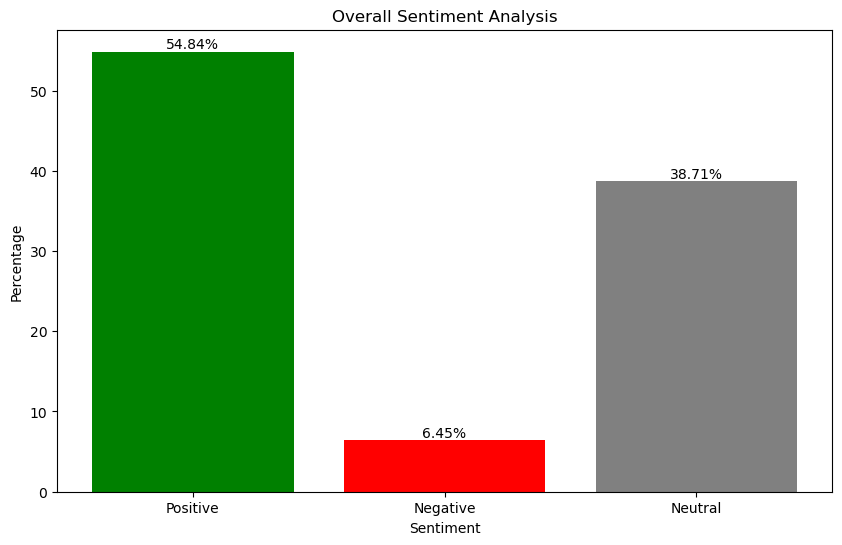

Sentiment analysis output saved to sentiment_analysis_output.json


In [13]:
import azure.cognitiveservices.speech as speechsdk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

# Azure Speech service setup
speech_key = "fc3a5dafb0d140cca6b1bdf318655b87"
service_region = "eastus"

def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    return sentiment

def sentiment_color(sentiment):
    if sentiment['compound'] >= 0.05:
        return 'green'
    elif sentiment['compound'] <= -0.05:
        return 'red'
    else:
        return 'grey'

def transcribe_and_analyze_sentiment():
    speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
    audio_config = speechsdk.audio.AudioConfig(use_default_microphone=True)
    speech_recognizer = speechsdk.SpeechRecognizer(speech_config=speech_config, audio_config=audio_config)
    sentiments = []

    def handle_final_result(evt):
        text = evt.result.text
        sentiment = analyze_sentiment_vader(text)
        color = sentiment_color(sentiment)
        
        # Use ANSI escape codes for colored output
        color_code = {
            'green': '\033[92m',  # Green
            'red': '\033[91m',    # Red
            'grey': '\033[90m'    # Grey
        }
        reset_color = '\033[0m'   # Reset to default color
        
        print(f"{color_code[color]}Transcribed: {text}")
        print(f"Sentiment: {sentiment}{reset_color}")
        
        sentiments.append(sentiment)

    speech_recognizer.recognized.connect(handle_final_result)
    print("Start speaking...")
    speech_recognizer.start_continuous_recognition()
    input("Press Enter to stop transcribing...\n")
    speech_recognizer.stop_continuous_recognition()
    overall = overall_sentiment(sentiments)
    plot_overall_sentiment(overall)
    save_results(sentiments, overall)
    
def overall_sentiment(sentiments):
    positive = 0
    negative = 0
    neutral = 0
    for sentiment in sentiments:
        if sentiment['compound'] >= 0.05:
            positive += 1
        elif sentiment['compound'] <= -0.05:
            negative += 1
        else:
            neutral += 1
    total = positive + negative + neutral
    overall = {
        "positive": positive / total * 100,
        "negative": negative / total * 100,
        "neutral": neutral / total * 100
    }
    print(f"Overall Sentiment: {overall}")
    return overall

def plot_overall_sentiment(overall):
    import matplotlib.pyplot as plt
    categories = ['Positive', 'Negative', 'Neutral']
    values = [overall['positive'], overall['negative'], overall['neutral']]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, values, color=['green', 'red', 'grey'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.title('Overall Sentiment Analysis')
    plt.savefig('overall_sentiment_plot.png')
    plt.show()

def save_results(sentiments, overall):
    output = {
        "sentiments": sentiments,
        "overall_sentiment": overall
    }

    output_file = 'sentiment_analysis_output.json'
    with open(output_file, 'w') as f:
        json.dump(output, f, indent=4)

    print(f"Sentiment analysis output saved to {output_file}")

if __name__ == "__main__":
    transcribe_and_analyze_sentiment()


In [10]:
pip install sounddevice numpy azure-cognitiveservices-speech nltk


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
